# SENTIMENT ANALYSIS ON LOANS

### Aim : To identity and extract opinions on Loans.

### Methodology : 
### 1) Clean and Preprocess text data using regular expressions and NLTK
### 2) Visualization using word cloud
### 3)  Performing sentiment analysis using SentimentIntensityAnalyzer model

### Conclusion:  Based on the visualization, it is understood from the data that there is still much negative thoughts around the idea of loans. And it is adviced that one should take more calculated steps when venturing into this aspect of finance.

In [1]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA # Using SentimentIntensityAnalyzer for analyzing the sentiments in the text data.


C:\Users\Kenechi\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# load text data

In [2]:
loan= pd.read_csv('loans.txt', sep = '.', names = ["Reviews", "Nan"])

In [3]:
# viewing the first five rows. 
loan.head() 

,Reviews,Nan
0,"Nigeria’s oldest bank, First Bank PLC over the...",
1,The affected workers were handed over their sa...,NaN
2,A source who confirmed the development to Medi...,NaN
3,"According to the source, most of the employees...",NaN
4,"“We first heard it as a rumour, but nobody bel...",NaN


In [4]:
# Length of text data.
loan.Reviews.value_counts().sum()

18

# Data cleaning and text preprocessing.

In [5]:
# Drop the Nan column, because it is not relevant.
loan.drop(['Nan'], axis = 1, inplace = True)

In [6]:
# Removing all the numbers in the data because it is not relevant.
no_numbers = []
for i in loan['Reviews']:
    hold = re.sub('\w*\d\w*', '', i)
    no_numbers.append(hold)
loan['no_numbers'] = no_numbers
loan.head() # displays the first five lines.

,Reviews,no_numbers
0,"Nigeria’s oldest bank, First Bank PLC over the...","Nigeria’s oldest bank, First Bank PLC over the..."
1,The affected workers were handed over their sa...,The affected workers were handed over their sa...
2,A source who confirmed the development to Medi...,A source who confirmed the development to Medi...
3,"According to the source, most of the employees...","According to the source, most of the employees..."
4,"“We first heard it as a rumour, but nobody bel...","“We first heard it as a rumour, but nobody bel..."


In [7]:
# Converting the reviews to lower cases because the data is case sensitive.
lower_case =[]
for i in loan['no_numbers']:
    hold = i.lower()
    lower_case.append(hold)

loan['lower_case'] = lower_case
loan.head()

,Reviews,no_numbers,lower_case
0,"Nigeria’s oldest bank, First Bank PLC over the...","Nigeria’s oldest bank, First Bank PLC over the...","nigeria’s oldest bank, first bank plc over the..."
1,The affected workers were handed over their sa...,The affected workers were handed over their sa...,the affected workers were handed over their sa...
2,A source who confirmed the development to Medi...,A source who confirmed the development to Medi...,a source who confirmed the development to medi...
3,"According to the source, most of the employees...","According to the source, most of the employees...","according to the source, most of the employees..."
4,"“We first heard it as a rumour, but nobody bel...","“We first heard it as a rumour, but nobody bel...","“we first heard it as a rumour, but nobody bel..."


In [8]:
# Removing Punctuations, because they do not add any form of relevance.

Final_form = []
for i in loan['lower_case'] :
    hold = re.sub('[%s]'%re.escape(string.punctuation), ' ',str(i))
    Final_form.append(hold)
    
loan['Final_form'] = Final_form
loan.head()

,Reviews,no_numbers,lower_case,Final_form
0,"Nigeria’s oldest bank, First Bank PLC over the...","Nigeria’s oldest bank, First Bank PLC over the...","nigeria’s oldest bank, first bank plc over the...",nigeria’s oldest bank first bank plc over the...
1,The affected workers were handed over their sa...,The affected workers were handed over their sa...,the affected workers were handed over their sa...,the affected workers were handed over their sa...
2,A source who confirmed the development to Medi...,A source who confirmed the development to Medi...,a source who confirmed the development to medi...,a source who confirmed the development to medi...
3,"According to the source, most of the employees...","According to the source, most of the employees...","according to the source, most of the employees...",according to the source most of the employees...
4,"“We first heard it as a rumour, but nobody bel...","“We first heard it as a rumour, but nobody bel...","“we first heard it as a rumour, but nobody bel...",“we first heard it as a rumour but nobody bel...


In [9]:
# Extracting the Final_form, by dropping the 'Reviews', 'no_numbers' and 'lower_case' columns because the Final_form column is what we would be working with.
loan.drop(['Reviews'], axis = 1, inplace = True)
loan.drop(['no_numbers'], axis = 1, inplace = True)
loan.drop(['lower_case'], axis = 1, inplace = True)
loan.head()

,Final_form
0,nigeria’s oldest bank first bank plc over the...
1,the affected workers were handed over their sa...
2,a source who confirmed the development to medi...
3,according to the source most of the employees...
4,“we first heard it as a rumour but nobody bel...


In [10]:
# Seperates every sentence into individual words.
tokenizer = RegexpTokenizer(r'\w+') 

In [11]:
# Removes Stopwords(removing words that have little or no meaning in the text data that occur frequently. examples: is,and,the,a, so on.) 
stopwords = stopwords.words('english') 
loan = list(loan.Final_form)
token = []
for words in loan:
    toks = tokenizer.tokenize(words)
    toks= [t.lower() for t in toks if t.lower() not in stopwords]
    token.extend(toks) # adds the content of a list into another list

In [12]:
# check the top 5 frequent words and how much they occur.
word_frequency = nltk.FreqDist(token)
word_frequency.most_common(5)

[('bank', 17), ('loans', 7), ('first', 6), ('employees', 6), ('response', 5)]

# Word Cloud

 ### word cloud is used in depicting key words in a corpus of text. It also gives a wonderful visualization of the text data,the more frequent a word is used in the text, the bigger in size it appears.we could also use word cloud to know the kind of words being used around or associated with  the word 'loan'.
 

 

In [13]:
# create a fucntion to implement word cloud.
def wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="black").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

In [14]:
# Convert reviews to string format.
str_ = ''
for i in loan:
    str_ += i

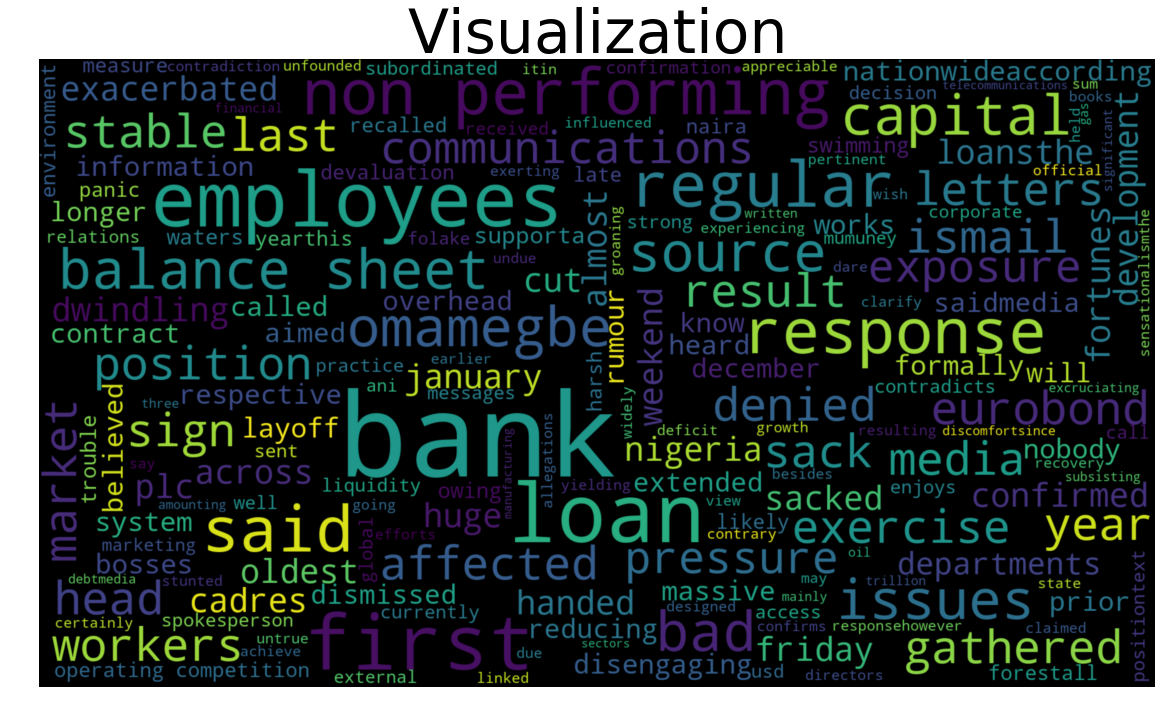

In [15]:
# Use the function to visualize 
wordcloud(str_, "Visualization") 

### From the visualizing above, it can be infered that there are negative thoughts around the idea of loans, such negative thoughts are depicted with the use of words such as sack, owing, trouble, allegations, rumour, layoff, panic, dwindling and so on.

# Sentiment analysis

In [16]:
sia = SIA() # Instantiate the SentimentIntensityAnalyzer model
review = []

for line in loan:
    polarity_score = sia.polarity_scores(line) # check the extent to which a sentence is either positive, negative and neurtral a sentence is.
    polarity_score['review'] = line # Extract the analyzed sentence.
    review.append(polarity_score)  # append every sentence and its score respectively to a review list. 

In [17]:
# display the scores
review

[{'neg': 0.0,
  'neu': 0.919,
  'pos': 0.081,
  'compound': 0.3182,
  'review': 'nigeria’s oldest bank  first bank plc over the weekend sacked over  regular employees of the bank in response to dwindling fortunes exacerbated by huge non performing loans'},
 {'neg': 0.127,
  'neu': 0.873,
  'pos': 0.0,
  'compound': -0.1531,
  'review': 'the affected workers were handed over their sack letters on friday  january   '},
 {'neg': 0.113,
  'neu': 0.887,
  'pos': 0.0,
  'compound': -0.4019,
  'review': 'a source who confirmed the development to media issues  said over  regular employees were affected in the exercise which cut across all cadres of employees in almost all the bank’s departments nationwide'},
 {'neg': 0.054,
  'neu': 0.878,
  'pos': 0.068,
  'compound': 0.1531,
  'review': 'according to the source  most of the employees had no prior information that such a massive layoff was in the works until they were called by their respective bosses to sign for letters formally disengaging 

In [18]:
# Convert review list to a pandas frame.
folder2 = pd.DataFrame.from_records(review)
folder2.head()

,compound,neg,neu,pos,review
0,0.3182,0.000,0.919,0.081,nigeria’s oldest bank first bank plc over the...
1,-0.1531,0.127,0.873,0.000,the affected workers were handed over their sa...
2,-0.4019,0.113,0.887,0.000,a source who confirmed the development to medi...
3,0.1531,0.054,0.878,0.068,according to the source most of the employees...
4,0.0000,0.000,1.000,0.000,“we first heard it as a rumour but nobody bel...


### Since the compound value gives a single value as sentiment score, we then create a threshold  such that  if the compound score is greater than 0.3 then it is positive, if less than -0.1 it is negative


In [19]:
folder2['grade'] = 0
folder2.loc[folder2['compound'] > 0.3, 'grade'] = 1 # i picked a higher threshold for positive because i want to obtain the really positve reviews that can be found.
folder2.loc[folder2['compound'] < -0.1, 'grade'] = -1
folder2.head()

,compound,neg,neu,pos,review,grade
0,0.3182,0.000,0.919,0.081,nigeria’s oldest bank first bank plc over the...,1
1,-0.1531,0.127,0.873,0.000,the affected workers were handed over their sa...,-1
2,-0.4019,0.113,0.887,0.000,a source who confirmed the development to medi...,-1
3,0.1531,0.054,0.878,0.068,according to the source most of the employees...,0
4,0.0000,0.000,1.000,0.000,“we first heard it as a rumour but nobody bel...,0


In [20]:
# Drop the negative,compund, neutral and positive columns
folder2.drop(['compound'], axis = 1, inplace = True)
folder2.drop(['neg'], axis = 1, inplace = True)
folder2.drop(['neu'], axis = 1, inplace = True)
folder2.drop(['pos'], axis = 1, inplace = True)

In [21]:
# Removing the neutral words which is indicated by a grade value of 0
new_folder2 = folder2[(folder2.grade == 1) | (folder2.grade == -1)]
new_folder2.head()

,review,grade
0,nigeria’s oldest bank first bank plc over the...,1
1,the affected workers were handed over their sa...,-1
2,a source who confirmed the development to medi...,-1
6,a sign that first bank was swimming in trouble...,-1
7,this was however denied by the bank’s spokespe...,1


# Results :

In [22]:
print("Positive reviews:\n")
print(list(new_folder2[new_folder2['grade'] == 1].review)[:3])


Positive reviews:

['nigeria’s oldest bank  first bank plc over the weekend sacked over  regular employees of the bank in response to dwindling fortunes exacerbated by huge non performing loans', 'this was however denied by the bank’s spokesperson  ismail omamegbe who said “the decision to call the subordinated eurobond was the result of our stable capital position  strong usd liquidity and market access as well as market practice”', 'but the sack of over  regular workers contradicts the bank’s position that it currently enjoys stable capital position']


In [23]:
print("\nNegative reviews:\n")
print(list(new_folder2[new_folder2['grade'] ==-1].review)[:3])


Negative reviews:

['the affected workers were handed over their sack letters on friday  january   ', 'a source who confirmed the development to media issues  said over  regular employees were affected in the exercise which cut across all cadres of employees in almost all the bank’s departments nationwide', 'a sign that first bank was swimming in trouble waters owing to competition and harsh operating environment was when it recalled its   eurobond late last year as panic measure to forestall likely devaluation of naira this year']


In [24]:
# Get the number of negative thoughts and positive thoughts around loans.
print(new_folder2.grade.value_counts())

-1    8
 1    5
Name: grade, dtype: int64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

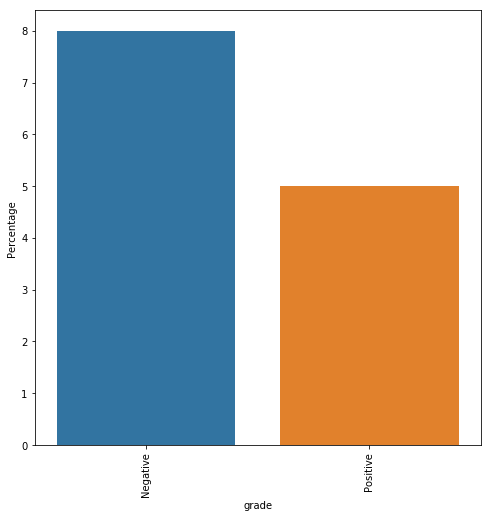

In [25]:
# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
g = sns.countplot(new_folder2.grade * 100)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.xticks(rotation = 90)

### Based on the visualization, it is understood from the data that there is still much negative thoughts around the idea of loans. And it is adviced that one should take more calculated steps when venturing into this aspect of finance.